[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HongB1/2022-KHU-Bioinformatics-lab/blob/master/code/Lab14_RF/Lab14_RF_xgb_modeling.ipynb)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/Users/hongb/Dropbox/github/2022_Bioinformatics_lab/code/Lab14_RF/22_final_data.HepG2.Histone.Enhancer.csv')

In [5]:
df

,Pos,gene_name,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,enhancer
0,chr10:100216834-100995619,HPSE2,0.00000,0.0,0.0,5.81644,0.00000,0.0,0.0,0.0,0.0,1
1,chr10:101156627-101190381,GOT1,0.00000,0.0,0.0,3.98603,0.00000,0.0,0.0,0.0,0.0,1
2,chr10:101286107-101290934,LINC01475,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
3,chr10:101286705-101288224,AL513542.1,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
4,chr10:101292699-101296281,NKX2-3,8.02894,0.0,0.0,13.50215,9.78393,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7129,chrX:9217960-9243246,AC003684.1,0.00000,0.0,0.0,4.01233,0.00000,0.0,0.0,0.0,0.0,1
7130,chrX:9983294-10112514,WWC3,0.00000,0.0,0.0,4.41356,0.00000,0.0,0.0,0.0,0.0,1
7131,chrX:99899192-99930785,SRPX2,0.00000,0.0,0.0,0.00000,4.75055,0.0,0.0,0.0,0.0,1
7132,chrX:9992882-10006694,WWC3-AS1,0.00000,0.0,0.0,4.41356,0.00000,0.0,0.0,0.0,0.0,1


In [5]:
!pip install missingno

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

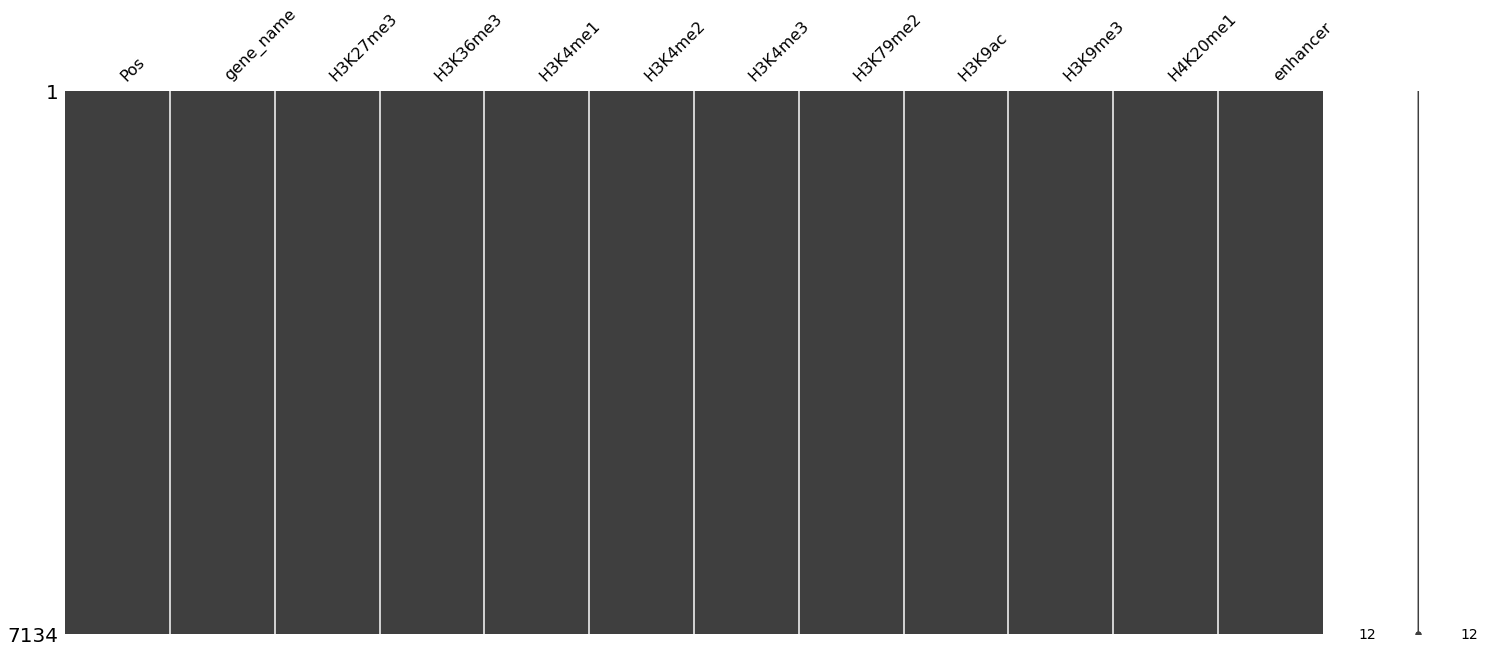

In [6]:
# 결측치 확인
import missingno as msno
display(msno.matrix(df))

<AxesSubplot:>

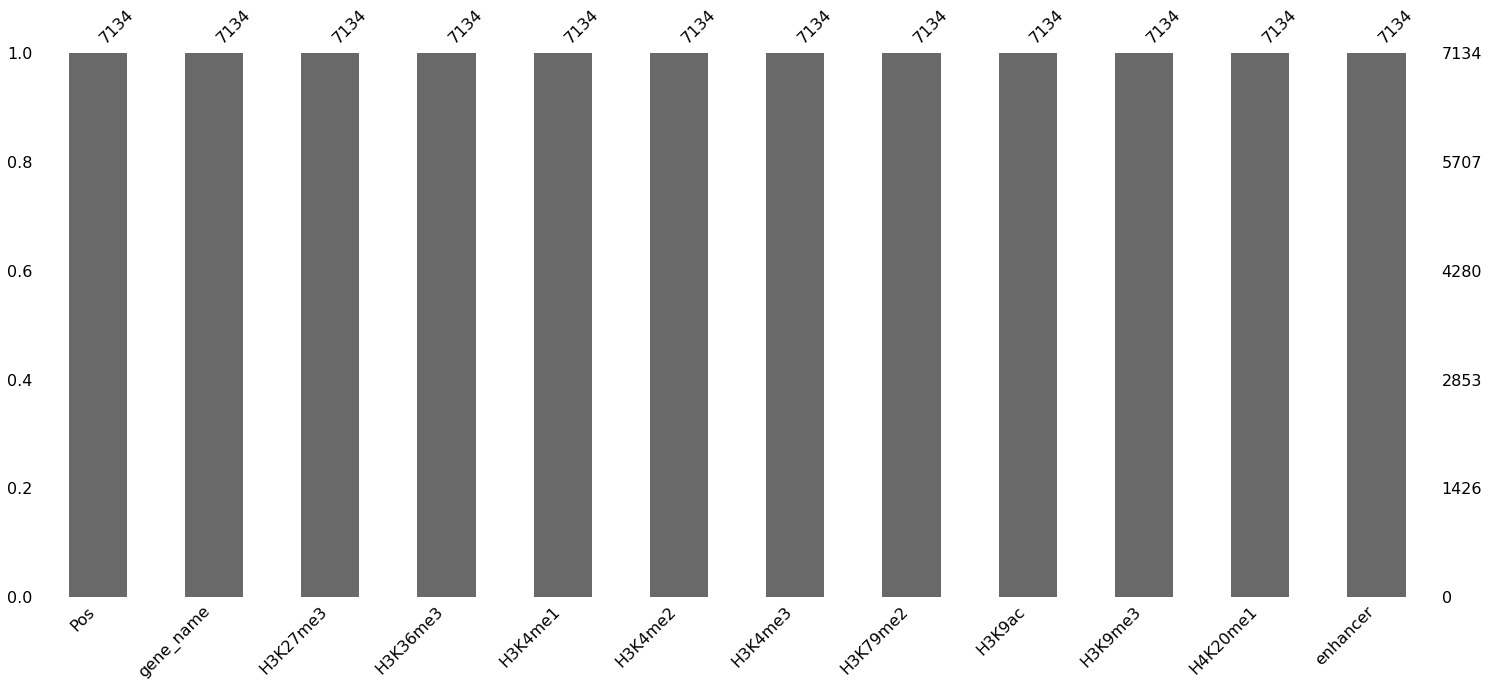

In [8]:
msno.bar(df)

In [10]:
# missing = df.isnull().sum()
# missing = missing[missing > 0]
# missing.sort_values(inplace=True)
# missing.plot.bar(figsize = (12,6))

In [11]:
df.describe()

,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,enhancer
count,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000
mean,1.425158,0.050376,0.925676,3.088716,3.559854,0.403111,0.898378,0.014459,0.195311,0.718531
std,2.576891,0.452893,1.989047,4.554636,5.405610,1.528361,2.660705,0.225790,0.911769,0.449747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.837962,0.000000,0.000000,5.318980,5.245690,0.000000,0.000000,0.000000,0.000000,1.000000
max,11.941240,6.326480,12.311430,34.643940,53.946900,20.411030,83.300270,5.899290,7.821960,1.000000


# Train Random Forest

In [12]:
df.head()

,Pos,gene_name,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,enhancer
0,chr10:100216834-100995619,HPSE2,0.00000,0.0,0.0,5.81644,0.00000,0.0,0.0,0.0,0.0,1
1,chr10:101156627-101190381,GOT1,0.00000,0.0,0.0,3.98603,0.00000,0.0,0.0,0.0,0.0,1
2,chr10:101286107-101290934,LINC01475,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
3,chr10:101286705-101288224,AL513542.1,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
4,chr10:101292699-101296281,NKX2-3,8.02894,0.0,0.0,13.50215,9.78393,0.0,0.0,0.0,0.0,0


In [13]:
df.values

array([['chr10:100216834-100995619', 'HPSE2', 0.0, ..., 0.0, 0.0, 1],
       ['chr10:101156627-101190381', 'GOT1', 0.0, ..., 0.0, 0.0, 1],
       ['chr10:101286107-101290934', 'LINC01475', 7.41865, ..., 0.0, 0.0,
        0],
       ...,
       ['chrX:99899192-99930785', 'SRPX2', 0.0, ..., 0.0, 0.0, 1],
       ['chrX:9992882-10006694', 'WWC3-AS1', 0.0, ..., 0.0, 0.0, 1],
       ['chrY:16634453-16957530', 'NLGN4Y', 0.0, ..., 0.0, 0.0, 1]],
      dtype=object)

In [15]:
df

,Pos,gene_name,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,enhancer
0,chr10:100216834-100995619,HPSE2,0.00000,0.0,0.0,5.81644,0.00000,0.0,0.0,0.0,0.0,1
1,chr10:101156627-101190381,GOT1,0.00000,0.0,0.0,3.98603,0.00000,0.0,0.0,0.0,0.0,1
2,chr10:101286107-101290934,LINC01475,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
3,chr10:101286705-101288224,AL513542.1,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
4,chr10:101292699-101296281,NKX2-3,8.02894,0.0,0.0,13.50215,9.78393,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7129,chrX:9217960-9243246,AC003684.1,0.00000,0.0,0.0,4.01233,0.00000,0.0,0.0,0.0,0.0,1
7130,chrX:9983294-10112514,WWC3,0.00000,0.0,0.0,4.41356,0.00000,0.0,0.0,0.0,0.0,1
7131,chrX:99899192-99930785,SRPX2,0.00000,0.0,0.0,0.00000,4.75055,0.0,0.0,0.0,0.0,1
7132,chrX:9992882-10006694,WWC3-AS1,0.00000,0.0,0.0,4.41356,0.00000,0.0,0.0,0.0,0.0,1


In [18]:
X_features = df.values[:,2:-1].astype('float')
y_target = df.values[:, -1].astype('float')

In [19]:
X_features

array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [7.41865, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]])

In [20]:
y_target

array([1., 1., 0., ..., 1., 1., 1.])

In [23]:
# 0과 1의 정답셋의 비율을 살펴본다.
np.bincount(y_target.astype(int))

# 균형이 맞지 않는 imbalanced data이므로, 이것을 방지해주기 위해 class_weight라는 parameter를 설정해준다.

array([2008, 5126])

In [58]:
# TODO PerfectGuide보고 HP튜닝 내용 보충하기.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = list(range(1, 30))
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# 연속형 범주나 많은 범주를 가진 feature들을 과대평가하는 경향이 있기 때문에 이를 완화시키는 옵션
# mean_impurity_decrease = 0 # float 형태. -> 시간이 너무 오래걸려서 뺌

class_weight = ['balanced', 'balanced_subsample']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': class_weight}

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2)

In [26]:
import multiprocessing

multiprocessing.cpu_count()

8

### 사이킷런 랜덤 포레스트 하이퍼 파라미터
>

In [28]:
import warnings
warnings.filterwarnings(action='ignore')

In [29]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = 6)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 i

[CV] END bootstrap=False, class_weight=balanced, max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   9.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   9.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   9.3s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, expli

[CV] END bootstrap=True, class_weight=balanced, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, class_weight=balan

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   6.8s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  10.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  10.7s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  11.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   9.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   9.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   9.7s
[CV]

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   9.1s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   9.1s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   8.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   8.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   8.8s
[CV] END bootstrap=False, class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, class_weigh

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.7s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=24, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   7.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=24, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   7.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=24, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   7.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   7.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   7.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800;

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   3.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   3.3s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   8.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   3.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=29, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   6.5s
[CV] END bootstrap=True, class_weight=balanced, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   7.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   7.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=29, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   6.6s
[CV

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=  11.5s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=  11.5s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=  13.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=  13.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=  14.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  15.1s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  16.3s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  16.5s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=27, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   8.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=27, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   8.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=27, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   8.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   5.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   3.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   5.3s
[CV] END bootstrap=True, class_weight=ba

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=19, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=19, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  10.5s
[CV] END bootstrap=False, class_weight=balanced, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  10.4s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  10.6s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  16.5s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  16.8s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  17.0s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   6.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   6.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   6.4s
[CV] END bootstrap=False, class_weight=balanced, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  15.7s
[CV] END bootstrap=False, class_weight=balanced, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  15.7s
[CV] END bootstrap=False, class_weight=balanced, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  16.2s
[CV]

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=19, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=  15.6s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=19, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=  16.1s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   8.1s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   8.6s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   9.0s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=  10.3s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=  10.3s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   9.9s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   4.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=  11.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   4.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=  11.7s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=  11.4s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   4.9s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   3.0s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   2.9s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   2.9s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   8.4s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   8.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   8.5s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  11.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  11.9s
[CV] END bootstrap=True, class_weight=balanced, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  12.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=  17.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   2.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=  19.1s
[C

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   5.3s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   9.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   9.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   9.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=  14.0s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=  14.9s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=  15.5s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  15.8s
[CV] END bootstrap=False, class_weight=balanced, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  15.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  16.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  10.6s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  10.6s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  10.2s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   6.0s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   6.5s
[CV] END bootstrap=False, class_weight=balanced, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   6.3s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  14.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  14.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  15.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  17.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  18.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  18.3s
[CV] END bootstrap=False, class

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=27, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   4.1s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   9.7s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.3s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.5s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.5s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  10.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  10.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  10.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.8s
[CV] EN

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   4.3s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   4.4s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  15.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  15.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  16.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   7.3s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   7.1s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   6.8s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=  11.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=  11.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=  11.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   5.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   5.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; to

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=29, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  15.7s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=29, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  15.9s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=27, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=  14.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=27, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=  16.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=27, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=  15.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  18.7s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  18.5s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  18.5s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=22, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, class_weight=balanced, max_depth=22, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, class_weight=balanced, max_depth=22, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, class_weight=balanced, max_depth=27, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   6.8s
[CV] END bootstrap=False, class_weight=balanced, max_depth=27, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   6.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=27, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   7.0s
[CV] END bootstrap=False, class_weigh

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=29, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=  17.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=29, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=  17.4s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  10.4s
[CV] END bootstrap=False, class_weight=balanced, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   9.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  10.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=  10.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=  10.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=  10.3s
[CV] END b

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=  15.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=24, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   4.1s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   3.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   3.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   3.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   5.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   5.2s
[CV] END bootstr

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, expli

[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=  10.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=  10.5s
[CV] END bootstrap=False, class_weight=balanced, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  15.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  15.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  15.5s
[CV] END bootstrap=False, class_weight=balanced, max_depth=29, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=  17.6s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.9s
[CV] END bootstrap=True, class_weight=balanced, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.9s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=29, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=  18.3s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.0s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=29, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=  18.1s


/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   8.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   8.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   8.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  13.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  13.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; to

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=6,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [30]:
rf_random.cv_results_

{'mean_fit_time': array([ 8.69907792, 11.91129295,  0.93287587,  1.39446004,  6.30247895,
         9.98334813,  9.12139217,  8.64133859, 13.64657633,  7.87666996,
         0.81247282,  1.81909815, 10.16237044,  6.13950006,  7.2707626 ,
         1.54740445,  6.65874004,  8.57556931,  7.44929401,  3.12677701,
         6.67391737,  6.19393897,  7.75663773, 10.67050362, 12.96842829,
        14.98522615,  7.60754736,  4.81572405,  3.03434658,  2.88095895,
         1.3128647 ,  9.77663096, 15.72331858, 14.83957338,  5.93536941,
        10.14514645, 14.4438719 ,  1.46886738,  7.9439253 ,  9.70102676,
        10.89739474,  4.39061348,  8.01893584,  2.74070803, 17.35981957,
        10.93538936,  2.70656602,  5.2539254 ,  8.61451062, 13.76169022,
        14.78316291,  9.82022206,  5.91411575, 13.20340172, 16.79993176,
         9.17042494,  3.78675707,  4.15616274,  9.93567363, 10.5991288 ,
         1.59328699, 14.25166273,  2.32011557,  9.57034063,  6.78440785,
        14.45246665, 14.91487662, 

In [31]:
rf_random.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=11,
                       max_features='auto', n_estimators=1200)

In [32]:
rf_random.best_score_

0.9106367922399724

In [33]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 11,
 'class_weight': 'balanced_subsample',
 'bootstrap': True}

In [34]:
best_model = rf_random.best_estimator_

# Plot feature importnace

In [35]:
best_model.feature_importances_

array([0.58938747, 0.00203129, 0.13682691, 0.07805281, 0.12981435,
       0.02662554, 0.02892523, 0.00112541, 0.00721099])

In [36]:
df.columns

Index(['Pos', 'gene_name', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me2',
       'H3K4me3', 'H3K79me2', 'H3K9ac', 'H3K9me3', 'H4K20me1', 'enhancer'],
      dtype='object')

In [37]:
features = df.columns[2:-1]

In [38]:
feature_df = pd.DataFrame(best_model.feature_importances_, columns = ['Importance value'])
feature_df.index = features

In [39]:
feature_df

,Importance value
H3K27me3,0.589387
H3K36me3,0.002031
H3K4me1,0.136827
H3K4me2,0.078053
H3K4me3,0.129814
H3K79me2,0.026626
H3K9ac,0.028925
H3K9me3,0.001125
H4K20me1,0.007211


<AxesSubplot:title={'center':'Feature importance'}>

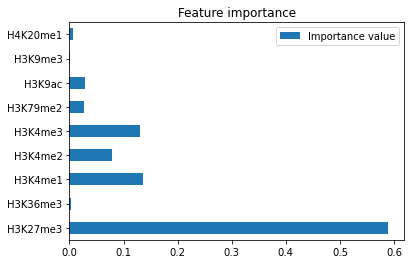

In [40]:
feature_df.plot(kind='barh', title = 'Feature importance')

In [41]:
test_result = best_model.predict(X_test)

In [42]:
test_result

array([0., 1., 1., ..., 0., 1., 1.])

In [43]:
best_model.score(X_test, y_test)

0.9110021023125437

# Confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix

pred = best_model.predict(X_test)
confusion_matrix(y_test, pred)

array([[339,  72],
       [ 55, 961]])

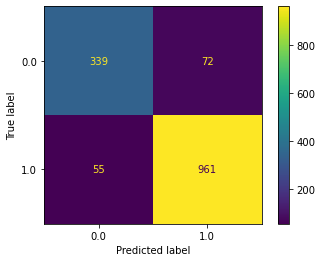

In [45]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_model, X_test, y_test) 

In [46]:
best_model.predict_proba(X_test)

array([[0.92562406, 0.07437594],
       [0.04681805, 0.95318195],
       [0.22454248, 0.77545752],
       ...,
       [0.7562509 , 0.2437491 ],
       [0.00547052, 0.99452948],
       [0.00562329, 0.99437671]])

In [47]:
best_model.predict_proba(X_test)[:, 0]

array([0.92562406, 0.04681805, 0.22454248, ..., 0.7562509 , 0.00547052,
       0.00562329])

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test , pred_proba_c1)
    roc_auc = auc(fprs, tprs)
    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, color='darkorange',
            label=f'ROC curve (area = {roc_auc:.2f})')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [55]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = best_model.predict_proba(X_test)[:, 1] 
fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)

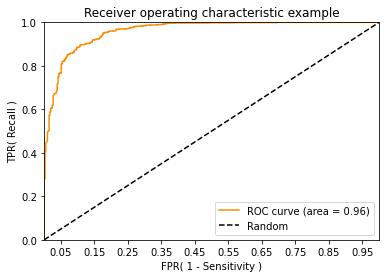

In [56]:
roc_curve_plot(y_test, pred_proba_class1)

In [1]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.5 MB/s eta 0:00:0000:0100:01


In [7]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [8]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 400

In [9]:
X_features = df.values[:,2:-1].astype('float')
y_target = df.values[:, -1].astype('float')
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2)

In [10]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [11]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[12:38:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[0]	train-logloss:0.62551	eval-logloss:0.62752
[1]	train-logloss:0.56983	eval-logloss:0.57352
[2]	train-logloss:0.52321	eval-logloss:0.52802
[3]	train-logloss:0.48419	eval-logloss:0.49057
[4]	train-logloss:0.45080	eval-logloss:0.45816
[5]	train-logloss:0.42226	eval-logloss:0.43063
[6]	train-logloss:0.39776	eval-logloss:0.40754
[7]	train-logloss:0.37672	eval-logloss:0.38779
[8]	train-logloss:0.35812	eval-logloss:0.37026
[9]	train-logloss:0.34200	eval-logloss:0.35500
[10]	train-logloss:0.32813	eval-logloss:0.34211
[11]	train-logloss:0.31576	eval-logloss:0.33057
[12]	train-logloss:0.30477	eval-logloss:0.32049
[13]	train-logloss:0.29527	eval-logloss:0.31158
[14]	train-logloss:0.28662	eval-logloss:0.30368
[15]	train-logloss:0.27923	eval-logloss:0.29735
[16]	train-logloss:0.27247	eval-logloss:0.29156
[17]	

In [12]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.862 0.987 0.972 0.945 0.006 0.    0.753 0.989 0.996 0.973]
예측값 10개만 표시:  [1, 1, 1, 1, 0, 0, 1, 1, 1, 1]


In [13]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [14]:
get_clf_eval(y_test, preds)

오차행렬:
 [[369  85]
 [ 39 934]]

정확도: 0.9131
정밀도: 0.9166
재현율: 0.9599
F1: 0.9378
AUC: 0.8863


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

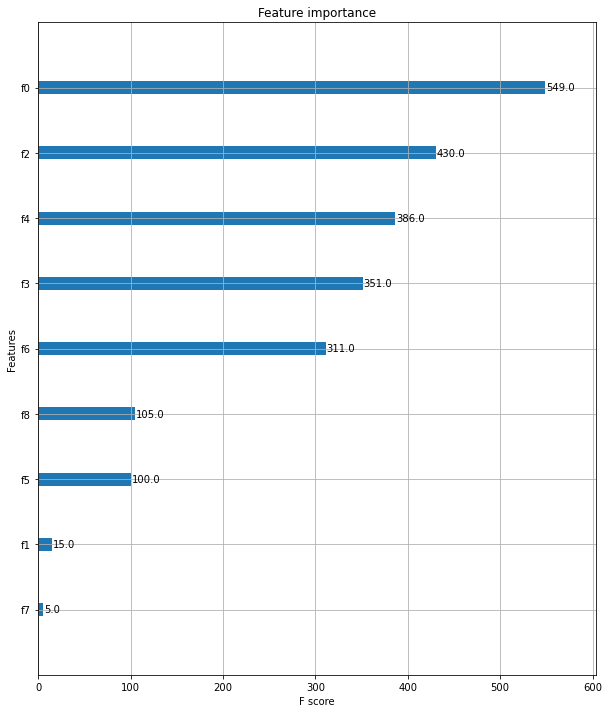

In [15]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)